![MNIST 7](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*AJ_zWZundfZ2-11eZUw5GA.png)


Please note in this autoencoder the number of neurons in latent space bottleneck is its dimension its getting compressed to

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


In [5]:
# Loading MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()# no y as its unsupervised
# spliting  last 10k of train as validation
x_train, x_val = x_train[:-10000], x_train[-10000:]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# normalizeing to [0,1] floats
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32')  / 255.
x_val   = x_val.astype('float32')   / 255.

In [7]:
print(x_train.shape, x_val.shape, x_test.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [8]:
# Defining my  autoencoder model
latent_dim = 64 #choosing 64 as its dimension in latent space

class SusnataAutoencoder(Model):
    def __init__(self, latent_dim):  #constructor
        super(SusnataAutoencoder, self).__init__()
        self.latent_dim = latent_dim
        # encoder: flatten 28x28 -> 784, then dense -> latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        # decoder: dense -> 784, reshape -> 28x28 back to original
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),# choosing sigmoid as outputs in between 0 and 1
            layers.Reshape((28, 28)),
        ])

#forward pass
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
# instantiate
autoencoder = SusnataAutoencoder(latent_dim)  #latent dimension is set to 64 and we can experminet with it

In [10]:
# compiling & train
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError()) # choosing adaptive momnetum optimizer and epoch 10, mse as continous
autoencoder.fit(x_train, x_train,   # output is same as its objective is to construct the same image
                epochs=10,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0473 - val_loss: 0.0111
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0094 - val_loss: 0.0061
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0041 - val_loss: 0.0042


In [12]:
# getting  encoded (latent) vectors and reconstructions for test set
encoded_imgs = autoencoder.encoder(x_test).numpy()   #images in the bottlneck
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy() #will see the reconstruction

In [16]:
print(autoencoder.encoder.summary()) #the information of 28x 28 is now confined in 64 pixels

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
print(autoencoder.decoder.summary()) #Maps it back to 784 then 28 x 28

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

None


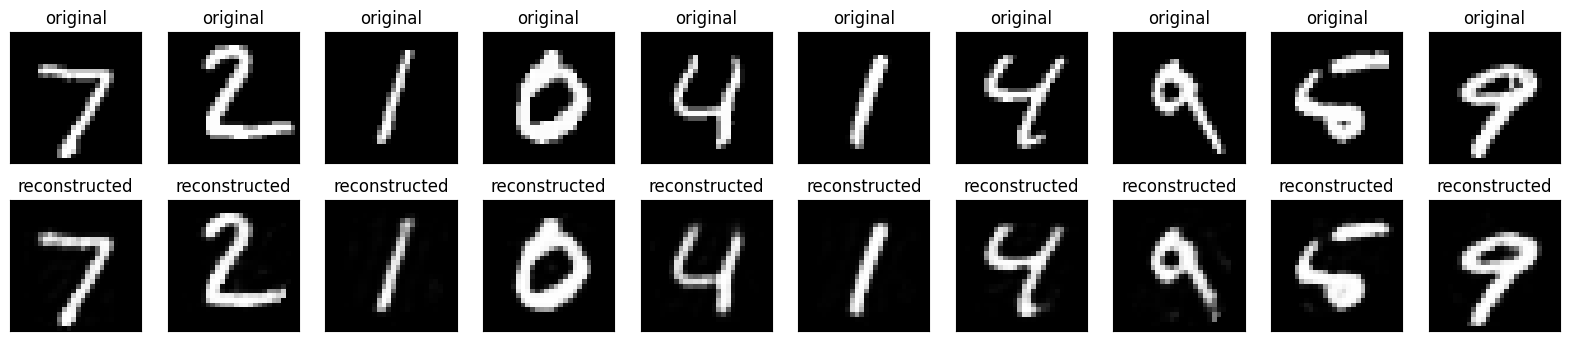

In [13]:
# visualizing originals vs reconstructions
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])  #iterate  through 10 images
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#My takeaways if you see 9 and 4 we will see that loop at the end of 4 is gone and that small line in the loop of 9 is gone
#This shows that its also good for  Denoising , which is also a variant of Autoencoder .Redundant variable are done away with
#noisy strokes are gone